In [31]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np

In [32]:
import extract_sentences_original

In [33]:
import string
punctuations = string.punctuation

In [34]:
from spacy.lang.en import English
parser = English()

In [35]:
#Custom transformer using spaCy 
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

In [36]:
# Basic utility function to clean the text 
def clean_text(text):     
    return text.strip().lower()

In [ ]:
#Create spacy tokenizer that parses a sentence and generates tokens
#these can also be replaced by word vectors 
def spacy_tokenizer(sentence):
    tokens = parser(sentence)
    tokens = [tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_ for tok in tokens]
    tokens = [tok for tok in tokens if (tok not in stopwords and tok not in punctuations)]     
    return tokens

In [83]:
sentences = [
        'The quick brown fox jumps over the lazy dog .',
        'By Jove , my quick study of lexicography won a prize .',
        'This is a short sentence .']
len(sentences)

3

In [89]:
tokenized_sentences = spacy_tokenizer(sentences[0])
(tokenized_sentences)

['quick', 'brown', 'fox', 'jump', 'lazy', 'dog']

In [37]:
#create vectorizer object to generate feature vectors, we will use custom spacy’s tokenizer
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
classifier = LinearSVC()

In [38]:
# Create the  pipeline to clean, tokenize, vectorize, and classify 
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

In [43]:
# Load sample data
#manually identified/tagged synthesis paragraphs
train_p = [[117, 118, 119], [112], [117], [122, 125], [88],
           [142, 146], [130], [115], [123,125], [105]]
p = [1,2,3,4,5,6,7,8,9,10]
syn_yes=[]
syn_no=[]
for i in range(len(p)):
    sen_yes_arr, sen_no_arr = extract_sentences_original.extract_sentences(r'C:\Users\neels\Desktop\Data Science\paper-parser\examples\journal_articles\Paper' + str(p[i]) + '.html', train_p[p[i]-1])
    for j in range(len(sen_yes_arr)):
        syn_yes.append(sen_yes_arr[j])
    for k in range(len(sen_no_arr)):
        syn_no.append(sen_no_arr[k])
Syn_sen=pd.DataFrame({'x':syn_yes, 'y':np.ones(len(syn_yes))}) #tagging 
Syn_not_sen=pd.DataFrame({'x':syn_no, 'y':np.zeros(len(syn_no))})
Train=[Syn_sen,Syn_not_sen]
train_data=pd.concat(Train,ignore_index=True)


,x,y
0,We placed approximately 500 mg of CH3NH3I and ...,1.0
1,The device substrates were placed in a substra...,1.0
2,Once the pressure in the chamber was pumped do...,1.0
3,The substrate holder was rotated to ensure uni...,1.0
4,The substrate holder was water-cooled to appro...,1.0
5,Perovskite films were optimized for best devic...,1.0
6,"In particular, device performance was very sen...",1.0
7,In our trials we performed the following steps.,1.0
8,(1) We varied the as-deposited composition of ...,1.0
9,(2) We varied the film thickness—at the optimu...,1.0


In [46]:
t=[0]
test_p = [[109]]
syn_test_yes=[]
syn_test_no=[]
for i in range(len(t)):
    sen_yes_arr, sen_no_arr = extract_sentences_original.extract_sentences(r'C:\Users\neels\Desktop\Data Science\paper-parser\examples\journal_articles\Paper' + str(t[i]) + '.html', test_p[t[i]])
    for j in range(len(sen_yes_arr)):
        syn_test_yes.append(sen_yes_arr[j])
    for k in range(len(sen_no_arr)):
        syn_test_no.append(sen_no_arr[k])
Syn_test_sen=pd.DataFrame({'X':syn_test_yes, 'Y':np.ones(len(syn_test_yes))})
Syn_test_not_sen=pd.DataFrame({'X':syn_test_no, 'Y':np.zeros(len(syn_test_no))})
Test=[Syn_test_sen,Syn_test_not_sen]
test_data=pd.concat(Test,ignore_index=True)

In [47]:
X_train=[str(train_data['x'][x]) for x in range(train_data.shape[0])]
Y_train=[str(train_data['y'][x]) for x in range(train_data.shape[0])]
X_test=[str(test_data['X'][x]) for x in range(test_data.shape[0])]
Y_test=[str(test_data['Y'][x]) for x in range(test_data.shape[0])]


In [75]:
# Create model and measure accuracy
a=pipe.fit([X_train[i] for i in range(len(X_train))], [Y_train[i] for i in range(len(Y_train))])

In [76]:
a

Pipeline(memory=None,
     steps=[('cleaner', <__main__.predictors object at 0x00000203EB6F7080>), ('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
      ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [77]:
pred_data = a.predict([X_test[i] for i in range(len(X_test))]) 
#for (sample, pred) in zip(X_test, pred_data):
#    print (sample, pred) 
print ("Accuracy:", accuracy_score([Y_test[i] for i in range(len(Y_test))], pred_data))

Accuracy: 0.9882491186839013


In [53]:
predicted_output = pred_data.astype(np.float)
Synthesis_sentence=[]
Not_Synthesis_sentence=[]
for i in range(len(predicted_output)):
    if predicted_output[i]==1:
        Synthesis_sentence.append(X_test[i])
    else:
        Not_Synthesis_sentence.append(X_test[i])

In [54]:
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)


In [56]:
count_vect = CountVectorizer()
X_test_counts = count_vect.fit_transform(X_test)


In [57]:
df=pd.DataFrame(X_train_counts.todense())
df_test=pd.DataFrame(X_test_counts.todense())

In [18]:
#x_train, x_test, y_train, y_test =  train_test_split(df,train_data['y'], test_size=0.10, random_state=111)


In [58]:
pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)
type(pca_2d)

numpy.ndarray

In [60]:
pca_test = PCA(n_components=2).fit(df_test)
pca_2d_test = pca_test.transform(df_test)
type(pca_2d_test)

numpy.ndarray

In [61]:
npa = np.asarray(Y_train, dtype=np.float32)
npa1=npa.astype(np.integer)
type(npa1)

numpy.ndarray

In [62]:
npa_test = np.asarray(Y_test, dtype=np.float32)
npa1_test=npa_test.astype(np.integer)
type(npa1_test)

numpy.ndarray

In [63]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions #added conda install mlxtend --channel conda-forge to base environment

In [64]:

svmClassifier_2d =   svm.LinearSVC(random_state=111,max_iter=10000).fit(  pca_2d,npa1 )

C:\Users\neels\Miniconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
C:\Users\neels\Miniconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, 'SVM Decision Region Boundary')

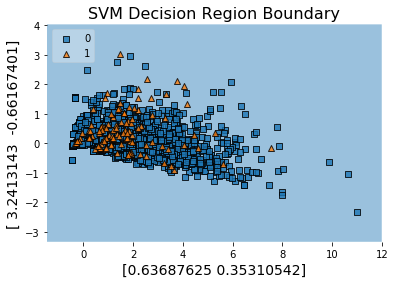

In [66]:
plot_decision_regions(X=pca_2d, 
                      y=npa1,
                      clf=svmClassifier_2d, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(pca_2d[0], size=14)
plt.ylabel(pca_2d[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1, solver='lbfgs')
clf2 = RandomForestClassifier(n_estimators=100, 
                              random_state=1)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')

In [68]:
# Loading Plotting Utilities
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
import numpy as np

Classifier: Logistic Regression Accuracy: 0.9753231492361927
Classifier: Random Forest Accuracy: 0.9764982373678026
Classifier: Naive Bayes Accuracy: 0.927144535840188
Classifier: SVM Accuracy: 0.9858989424206815


C:\Users\neels\Miniconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


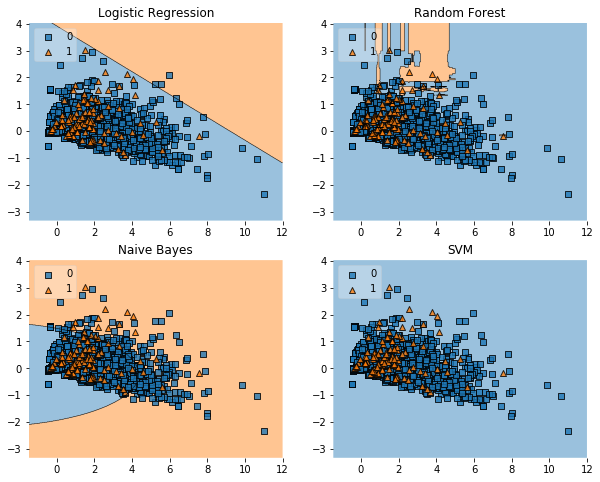

In [69]:
gs = gridspec.GridSpec(2, 2)
from sklearn.metrics import accuracy_score
fig = plt.figure(figsize=(10,8))
labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    Trained_model=clf.fit(pca_2d,npa1)
    pred_data = Trained_model.predict(pca_2d_test)
    print ("Classifier:", lab,"Accuracy:", accuracy_score(npa1_test, pred_data))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=pca_2d, y=npa1, clf=clf, legend=2)
    plt.title(lab)
plt.show()


In [29]:
npa1_test_relative=[]
pred_data_relative=[]
for i in range(len(npa1_test)):
    if npa1_test[i]==pred_data[i]==1:
        npa1_test_relative.append(npa1_test[i])
        pred_data_relative.append(pred_data[i])
    else:
        pass
